> Note: Materi ini merupakan materi supplemental, tidak bersifat wajib. Namun akan mendukung kalian menjadi seorang _AI engineer_ yang handal.

# Direction of a vector

Vector consists of two components: direction and magnitude. For the direction of a vector, we basically "remove" the magnitude of the vector and keep only the direction. That's why the formula as simple as below:

$$
\text{Direction of vector } x = \frac{x}{\|x\|}
$$

So the direction of a vector is a vector that reduced to only have a "direction" component where the magnitude of the vector is 1. The vector that have the magnitude of 1 is called a unit vector.

# Moving in the direction of a vector

We can move an `x` vector several "steps" in the direction of `y` by using the formula below:

$$
\text{Move } x \text{ in the direction of } y = x + k \frac{y}{\|y\|}
$$

Where `k` is the number of steps we want to move in the direction of `y`.

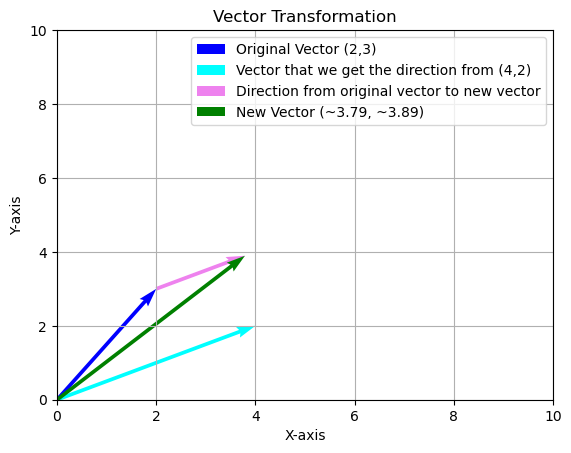

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original vector
original_vector = np.array([2, 3])

# Direction vector
direction_vector = np.array([4, 2])

# Normalizing the direction vector
normalized_direction_vector = direction_vector / np.linalg.norm(direction_vector)

# Moving the original vector 2 units in the direction of the direction vector
new_vector = original_vector + 2 * normalized_direction_vector
new_vector


# Creating the plot
fig, ax = plt.subplots()

# Original vector
ax.quiver(0, 0, original_vector[0], original_vector[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector (2,3)')

ax.quiver(0, 0, direction_vector[0], direction_vector[1], angles='xy', scale_units='xy', scale=1, color='cyan', label='Vector that we get the direction from (4,2)')

ax.quiver(original_vector[0], original_vector[1], normalized_direction_vector[0] * 2, normalized_direction_vector[1] *2, angles='xy', scale_units='xy', scale=1, color='violet',
label='Direction from original vector to new vector')

# New vector
ax.quiver(0, 0, new_vector[0], new_vector[1], angles='xy', scale_units='xy', scale=1, color='green', label='New Vector (~3.79, ~3.89)')

# Setting the limits
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

# Adding labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Vector Transformation')
ax.legend()

# Display the plot
plt.grid(True)
plt.show()


Play around with above formula by changing the value of `k` and see how the vector `x` move in the direction of `y`.

# Dot product of a vector with itself

One formula that we need for the next section is the dot product of a vector with itself. The formula is as simple as below:

$$
x \cdot x = \|x\|^2
$$

So basically the dot product of a vector with itself is the square of the magnitude of the vector.

# Deriving the margin width formula

## All the equations needed to derive the margin width formula

So before we've already learned that SVM is about finding the most optimal hyperplane, and the most optimal hyperplane is the one that has the largest margin. But how do we calculate the margin width?

The width of the margin can be thought of as the distance of any of the possible vector inside of the hyperplane to their corresponding support vector.

Because it doesn't matter of which class to choose to get the width (as the margin should have the same width for both classes), we can choose below formula for our calculation:

$$
\text{Support Vector for class 1}: w \cdot x + b = 1 \\
$$

Where $w$ is the weight vector, $x$ is the input vector, and $b$ is the bias.

And let's have another constraint that we've learned about hyperplane

$$
\text{Hyperplane}: w \cdot x + b = 0 \\
$$

## Quick intuition

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets, Layout

coefficients =[[ 1, -0.6]]
intercept_ = [-0.6]

# Normalizing the direction vector
normalized_direction_vector = coefficients / np.linalg.norm(coefficients)


def update_plot(number_of_moves):
    original_vector = np.array([4, 5.67])
    # Moving the original vector in the direction of the direction vector
    new_vector = original_vector + number_of_moves * normalized_direction_vector

    # Creating the plot
    fig, ax = plt.subplots()

    x_vals = np.linspace(-10, 10, 100)
    y_vals = (-(coefficients[0][0] * x_vals) - intercept_[0]) / coefficients[0][1]
    plt.plot(x_vals, y_vals, 'green', label='Hyperplane')

 #Plotting the line that goes through the support vector with class 1
    y_vals_1 = (1-(coefficients[0][0] * x_vals) - intercept_[0]) / coefficients[0][1]
    plt.plot(x_vals, y_vals_1, 'purple', label='Line that goes through support vector with class 1', linestyle='--')

    #Plotting the line that goes through the support vector with class -1
    y_vals_2 = (-1-(coefficients[0][0] * x_vals) - intercept_[0]) / coefficients[0][1]
    plt.plot(x_vals, y_vals_2, 'purple', label='Line that goes through support vector with class -1', linestyle='--')

    # Setting the limits
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])

    # Adding labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Vector Transformation')
    ax.legend()

    plt.scatter(new_vector[0][0], new_vector[0][1], color='red', label='New Vector')
    # Display the plot
    plt.grid(True)
    plt.show()

# Create an interactive slider for number_of_moves ranging from 1 to 10
number_of_moves_slider = widgets.FloatSlider(value=0, min=0, max=10, step=0.1, description='k: ', layout=Layout(width='50%'))
interact(update_plot, number_of_moves=number_of_moves_slider)


interactive(children=(FloatSlider(value=0.0, description='k: ', layout=Layout(width='50%'), max=10.0), Output(…

<function __main__.update_plot(number_of_moves)>

So on above interactive plot, you can try to slide the slider to change the value of $k$ and see how the red points move. Several things to notice here:

1. The red point is a point on the hyperplane, so it should satisfy the hyperplane equation $w \cdot x + b = 0$.
2. If we move the red point in the direction of the support vector, at one point it will satisfy the support vector equation $w \cdot x + b = 1$, meaning that red point is now a support vector.
3. The distance between the red point from the origin to it's corresponding support vector is half of the margin width because it's only moving from the hyper plane to it's corresponding support vector, the full margin width is the distance between the two support vectors, basically twice the distance between the red point and it's corresponding support vector.
4. The direction of the red point moving from the hyper plane towards it's corresponding support vector is $k \frac{w}{\|w\|}$.

If you're feeling confident with above points, let's move on to the next section.



## Calculating

So given $x$ a vector inside the hyperplane:

$$
\text{Hyperplane}: w \cdot x + b = 0 \\
$$

And given $y$ is a vector inside the support vector that is the counterpart of $x$ when $x$ moves several unit of direction towards the support vector:

$$
y = x + k \times \text{direction towards the support vector} \\
$$

The direction itself is the same direction as the $w$ vector, and the $k$ is the unit that $x$ needs to reach to $y$.

$$
y = x + k \frac{w}{\|w\|} \\
$$

The $y$ itself as said above is a support vector of $x$ counterpart, which means:

$$
w \cdot y + b = 1 \\
$$
$$
w \cdot (x + k \frac{w}{\|w\|}) + b = 1 \\
$$
$$
w \cdot x + k \frac{w \cdot w}{\|w\|} + b = 1 \\
$$

$$
w \cdot x + b + k \frac{w \cdot w}{\|w\|}  = 1 \\
$$

And we already know that $w \cdot x + b = 0$, so:

$$
k \frac{w \cdot w}{\|w\|}  = 1 \\
$$
$$
k \frac{\|w\|^2}{\|w\|}  = 1 \\
$$
$$
k \|w\|  = 1 \\
$$
$$
k = \frac{1}{\|w\|} \\
$$

So for the width of the margin, because it's distance is basically the same between two classes, we can just multiply the $k$ with 2:

$$
\text{Width of the margin} = 2k = \frac{2}{\|w\|} \\
$$

Then we can see that if we want to maximize the margin width, we need to minimize the $\|w\|$ (the magnitude of vector w) because it's in the denominator, the lower the value of $\|w\|$, the higher the width of the margin.